In [1]:
import re
import pandas as pd

In [2]:
import pandas as pd

# Specify the column names based on adult.names file
column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

# Load the dataset using adult.data
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
Data_set = pd.read_csv(data_url, names=column_names, na_values=" ?", skipinitialspace=True)

# Display the first few rows of the dataframe
(Data_set.head())


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
print("No of rows in dataset before preprocessing : ", len(Data_set))

No of rows in dataset before preprocessing :  32561


### Find duplicates

In [4]:
Data_set.duplicated().values.any()

True

In [5]:
print("Duplicate Rows except first occurrence:")

duplicates = Data_set[Data_set.duplicated()]
duplicates

Duplicate Rows except first occurrence:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


### Drop duplicates

In [6]:
# Drop duplicates
Data_set_no_duplicates = Data_set.drop_duplicates()
Data_set_no_duplicates

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
print("No of rows in dataset after removing duplicates : ", len(Data_set_no_duplicates))

No of rows in dataset after removing duplicates :  32537


### Handle categorical variables

In [8]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'income' is the column you want to predict
label_encoder = LabelEncoder()
Data_set_no_duplicates = Data_set_no_duplicates.copy()  # Create a copy of the DataFrame
Data_set_no_duplicates['income'] = label_encoder.fit_transform(Data_set_no_duplicates['income'])


In [9]:
Data_set_no_duplicates

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


<Figure size 10000x5000 with 0 Axes>

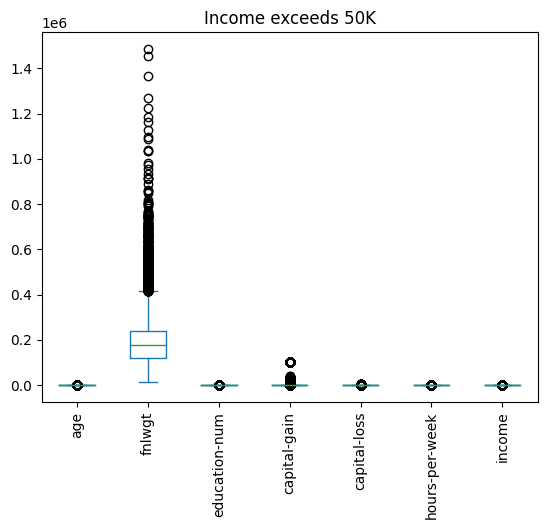

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(100, 50))
Data_set_no_duplicates.plot.box(title='Income exceeds 50K',rot=90)

plt.show()

### Making all the outliers as null values from IQR technique

In [11]:
import numpy as np

# Function to replace outliers with null values based on IQR
def handle_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    column[(column < lower_bound) | (column > upper_bound)] = np.nan
    return column

# Apply the outlier handling function to numeric columns
numeric_columns = Data_set_no_duplicates.select_dtypes(include=['int64', 'float64']).columns
Data_set_no_duplicates[numeric_columns] = Data_set_no_duplicates[numeric_columns].apply(handle_outliers_iqr, axis=0)

# Display the modified DataFrame
print("Dataset after handling outliers:")
(Data_set_no_duplicates)

Dataset after handling outliers:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,NaN,0.0,40.0,United-States,0
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,NaN,United-States,0
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,0
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,0
32557,40.0,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,1
32558,58.0,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,0
32559,22.0,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,NaN,United-States,0


### Finding null values in the dataset

In [12]:
Data_set_no_duplicates.isna().sum().any()

True

In [13]:
Data_set_no_duplicates.isna().sum()

age                142
workclass            0
fnlwgt             993
education            0
education-num     1193
marital-status       0
occupation           0
relationship         0
race                 0
sex                  0
capital-gain      2712
capital-loss      1519
hours-per-week    9002
native-country       0
income               0
dtype: int64

In [14]:
# Check for null values in the dataset
null_values = Data_set_no_duplicates.isnull().sum()

# Display columns with null values and their counts
print("Columns with null values:")
print(null_values[null_values > 0])

# Display total count of null values
print("\nTotal null values in the dataset:", null_values.sum())


Columns with null values:
age                142
fnlwgt             993
education-num     1193
capital-gain      2712
capital-loss      1519
hours-per-week    9002
dtype: int64

Total null values in the dataset: 15561


### Removing all the null values

In [15]:
df2 = Data_set_no_duplicates.dropna()
df2=Data_set_no_duplicates.dropna(axis=0)

# Reset index after drop
df2=Data_set_no_duplicates.dropna().reset_index(drop=True)

Data_set_no_duplicates = df2
df2

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
1,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,0
2,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0
3,37.0,Private,284582.0,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,0
4,52.0,Self-emp-not-inc,209642.0,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18978,53.0,Private,321865.0,Masters,14.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.0,United-States,1
18979,22.0,Private,310152.0,Some-college,10.0,Never-married,Protective-serv,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
18980,27.0,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,0
18981,40.0,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,1


### Summary of dataset before performing standard scalar

In [16]:
df2.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
count,18983.000000,18983.000000,18983.000000,18983.0,18983.0,18983.000000,18983.000000
mean,38.051889,180616.248591,10.246062,0.0,0.0,41.469841,0.211663
std,12.026518,86969.808188,2.152441,0.0,0.0,3.950346,0.408498
min,17.000000,14878.000000,5.000000,0.0,0.0,33.000000,0.000000
25%,28.000000,117488.000000,9.000000,0.0,0.0,40.000000,0.000000
50%,37.000000,176831.000000,10.000000,0.0,0.0,40.000000,0.000000
75%,47.000000,228740.500000,12.000000,0.0,0.0,40.000000,0.000000
max,78.000000,415578.000000,16.000000,0.0,0.0,52.000000,1.000000


Standard Deviation of each numeric column:
age                  12.026518
fnlwgt            86969.808188
education-num         2.152441
capital-gain          0.000000
capital-loss          0.000000
hours-per-week        3.950346
dtype: float64


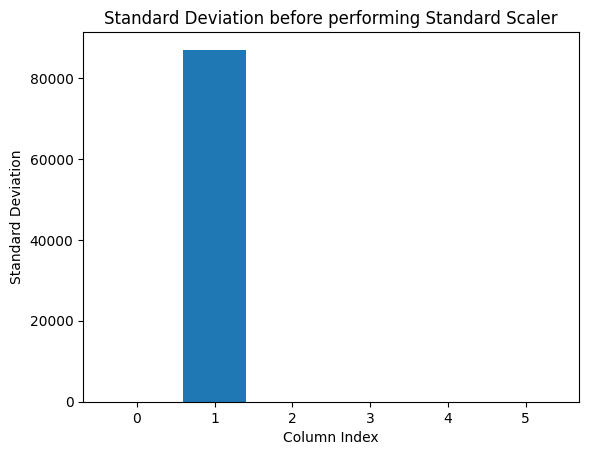

In [17]:
# Select only numeric columns
numeric_columns = df2.select_dtypes(include=['int64', 'float64'])

# Calculate the standard deviation of numeric columns
std_deviation_numeric = numeric_columns.std()

# Display the standard deviation for each numeric column
print("Standard Deviation of each numeric column:")
print(std_deviation_numeric)

plt.bar(range(len(std_deviation_numeric)), std_deviation_numeric)
plt.title("Standard Deviation before performing Standard Scaler")
plt.xlabel("Column Index")
plt.ylabel("Standard Deviation")
plt.show()


Mean of each numeric column:
age                   38.051889
fnlwgt            180616.248591
education-num         10.246062
capital-gain           0.000000
capital-loss           0.000000
hours-per-week        41.469841
dtype: float64


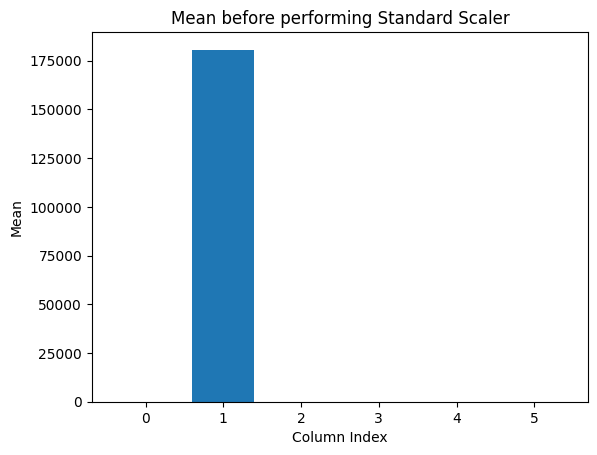

In [18]:
# Calculate the mean of numeric columns
mean_values = numeric_columns.mean()

# Display the mean for each numeric column
print("Mean of each numeric column:")
print(mean_values)

# Plot the mean of all columns
plt.bar(range(len(mean_values)), mean_values)
plt.title("Mean before performing Standard Scaler")
plt.xlabel("Column Index")
plt.ylabel("Mean")
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numeric columns using StandardScaler
scaled_data = scaler.fit_transform(numeric_columns)

# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=numeric_columns.columns)

# Concatenate the scaled numeric columns with non-numeric columns
final_scaled_data = pd.concat([scaled_df, df2.select_dtypes(exclude=['int64', 'float64'])], axis=1)

# Display the dataset after standard scaling
print("Dataset after standard scaling:")
(final_scaled_data)


Dataset after standard scaling:


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,-0.004315,0.402791,-0.578922,0.0,0.0,-0.372089,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,0
1,1.242962,0.622126,-1.508124,0.0,0.0,-0.372089,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,0
2,-0.835832,1.814387,1.279482,0.0,0.0,-0.372089,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,0
3,-0.087466,1.195455,1.744083,0.0,0.0,-0.372089,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,0
4,1.159810,0.333754,-0.578922,0.0,0.0,0.893656,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18978,1.242962,1.624155,1.744083,0.0,0.0,-0.372089,Private,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,1
18979,-1.334743,1.489473,-0.114321,0.0,0.0,-0.372089,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,United-States,0
18980,-0.918984,0.881775,0.814881,0.0,0.0,-0.878387,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,0
18981,0.161989,-0.301748,-0.578922,0.0,0.0,-0.372089,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,1


Standard Deviation of each scaled numeric column:
age               1.000026
fnlwgt            1.000026
education-num     1.000026
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    1.000026
dtype: float64


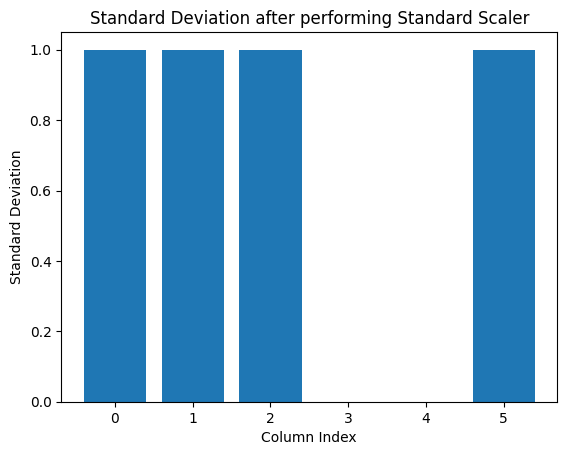

In [20]:
# Select only the scaled numeric columns
scaled_numeric_columns = final_scaled_data.select_dtypes(include=['int64', 'float64'])

# Calculate the standard deviation of scaled numeric columns
std_deviation_scaled = scaled_numeric_columns.std()

# Display the standard deviation for each scaled numeric column
print("Standard Deviation of each scaled numeric column:")
print(std_deviation_scaled)

# Plot the standard deviation of all columns
plt.bar(range(len(std_deviation_scaled)), std_deviation_scaled)
plt.title("Standard Deviation after performing Standard Scaler")
plt.xlabel("Column Index")
plt.ylabel("Standard Deviation")
plt.show()


Mean of each scaled numeric column:
age              -1.968843e-16
fnlwgt           -1.207133e-16
education-num    -3.750534e-16
capital-gain      0.000000e+00
capital-loss      0.000000e+00
hours-per-week    8.878509e-16
dtype: float64


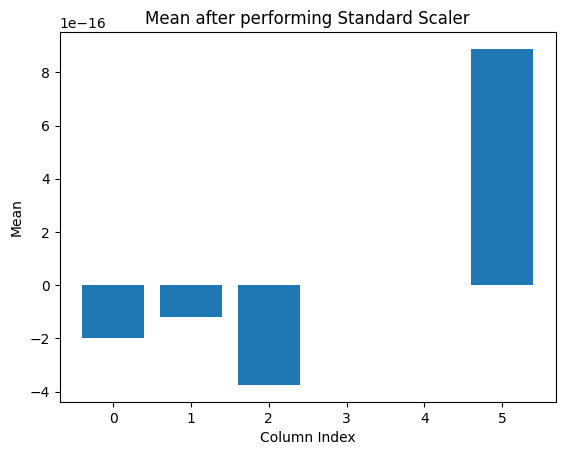

In [21]:
# Calculate the mean of scaled numeric columns
mean_values_scaled = scaled_numeric_columns.mean()

# Display the mean for each scaled numeric column
print("Mean of each scaled numeric column:")
print(mean_values_scaled)

# Plot the mean of all columns
plt.bar(range(len(mean_values_scaled)), mean_values_scaled)
plt.title("Mean after performing Standard Scaler")
plt.xlabel("Column Index")
plt.ylabel("Mean")
plt.show()


In [22]:
# Display a summary of the dataset after standard scaling
summary_after_scaling = final_scaled_data.describe()

# Transpose the summary for better readability
summary_after_scaling = summary_after_scaling.T

# Display the transposed summary
print("Summary of the dataset after standard scaling:")
(summary_after_scaling)


Summary of the dataset after standard scaling:


,count,mean,std,min,25%,50%,75%,max
age,18983.0,-1.968843e-16,1.000026,-1.750502,-0.835832,-0.087466,0.744051,3.321757
fnlwgt,18983.0,-1.207133e-16,1.000026,-1.905749,-0.725883,-0.043525,0.553359,2.701719
education-num,18983.0,-3.750534e-16,1.000026,-2.437326,-0.578922,-0.114321,0.814881,2.673286
capital-gain,18983.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
capital-loss,18983.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
hours-per-week,18983.0,8.878509e-16,1.000026,-2.144133,-0.372089,-0.372089,-0.372089,2.665700
income,18983.0,2.116631e-01,0.408498,0.000000,0.000000,0.000000,0.000000,1.000000


### Performing PCA to the dataset

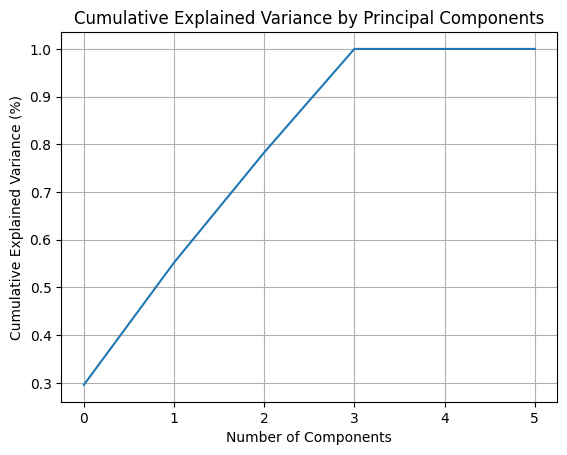

In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming 'final_scaled_data' is your dataset after standard scaling
# Select only the scaled numeric columns for PCA
numeric_columns_for_pca = final_scaled_data.select_dtypes(include=['int64', 'float64'])

pca = PCA()
principalComponents = pca.fit_transform(numeric_columns_for_pca)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Cumulative Explained Variance by Principal Components')
plt.grid(True)
plt.show()


In [24]:
# Set a threshold, for example, 95%
threshold = 0.95
num_components_threshold = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= threshold) + 1
print("Number of components to retain for {}% variance:".format(threshold * 100), num_components_threshold)


Number of components to retain for 95.0% variance: 4


In [25]:
num_components_to_retain = 4  # Adjust as needed

# Apply PCA with the selected number of components
pca = PCA(n_components=num_components_to_retain)
pca_result_final = pca.fit_transform(numeric_columns_for_pca)

# Create a DataFrame with the selected principal components
pca_components_df = pd.DataFrame(data=pca_result_final, columns=[f"PC{i+1}" for i in range(num_components_to_retain)])

# Concatenate the principal components with non-numeric columns
final_data_with_pca = pd.concat([pca_components_df, final_scaled_data.select_dtypes(exclude=['int64', 'float64'])], axis=1)

# Display the dataset with PCA components
print("Dataset with PCA components:")
(final_data_with_pca)

Dataset with PCA components:


,PC1,PC2,PC3,PC4,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,-0.690592,-0.064276,0.373084,0.124976,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,0
1,-0.745735,-0.829151,1.595986,0.744381,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,0
2,-0.411140,1.979781,0.351830,-1.246511,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,0
3,0.400559,1.352252,0.452319,-1.556732,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,0
4,0.598684,-0.168409,1.098802,0.998085,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18978,0.868829,1.022860,1.726510,-1.606603,Private,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,1
18979,-1.362694,1.496493,-0.014042,-0.234441,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,United-States,0
18980,-0.725143,0.999652,-0.185862,-1.223917,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,0
18981,-0.392017,-0.639586,0.052578,0.159312,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,1


In [26]:
print(pca.explained_variance_)


[1.18300013 1.02545419 0.92371851 0.86803789]


In [27]:
print(pca.components_)

[[ 0.45399417 -0.31662517  0.59400605 -0.         -0.          0.58377617]
 [-0.47460824  0.70454726  0.35238632 -0.         -0.          0.39266277]
 [ 0.75380806  0.63284907 -0.15485156  0.          0.         -0.08541931]
 [-0.02024138 -0.05351371 -0.70640052  0.          0.          0.70549619]]


# Build the predictive model using Decision trees


### Splitting rhe dataset into the training set and testing set

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Assuming 'final_data_with_pca' is your dataset with PCA components and other features
# Replace it with your actual dataset

# Identify the features (X) and target variable (y)
X = final_data_with_pca.drop('income', axis=1)  # Replace 'target_variable_column' with the actual column name
y = final_data_with_pca['income']

# One-hot encode categorical features
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
X_categorical = pd.get_dummies(X[categorical_columns], drop_first=True)

# Concatenate one-hot encoded features with the numeric features
X_encoded = pd.concat([X.drop(categorical_columns, axis=1), X_categorical], axis=1)

# Split the dataset into training and testing sets (adjust test_size and random_state as needed)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (15186, 93)
Shape of X_test: (3797, 93)
Shape of y_train: (15186,)
Shape of y_test: (3797,)


### Fitting classifier into training set

In [29]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Accuracy of testing dataset

In [30]:
from sklearn.metrics import accuracy_score

y_train_pred = dt_classifier.predict(X_test)
accuracy_score(y_test, y_train_pred)

0.7829865683434291

In [31]:
# # Assuming you have scikit-learn installed, you can use metrics for evaluation
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# classification_rep = classification_report(y_test, y_train_pred)
# print('\nClassification Report:')
# print(classification_rep)

In [32]:
from sklearn.metrics import accuracy_score

# Predict the labels for the training set
y_train_pred_train = dt_classifier.predict(X_train)

# Calculate the accuracy of the training set
accuracy_train = accuracy_score(y_train, y_train_pred_train)

print(f'Accuracy on the training set: {accuracy_train * 100:.2f}%')


Accuracy on the training set: 100.00%


In [34]:
# from sklearn import tree
# import matplotlib.pyplot as plt

# # Set the figure size
# plt.figure(figsize=(12, 8))

# # Plot the Decision Tree
# tree.plot_tree(dt_classifier, filled=True, feature_names=X_encoded.columns, class_names=['<=50K', '>50K'], rounded=True, fontsize=10)

# # Save the plot to a file (adjust the filename and format as needed)
# plt.savefig('decision_tree_visualization.png', bbox_inches='tight')

# # Show the plot
# plt.show()


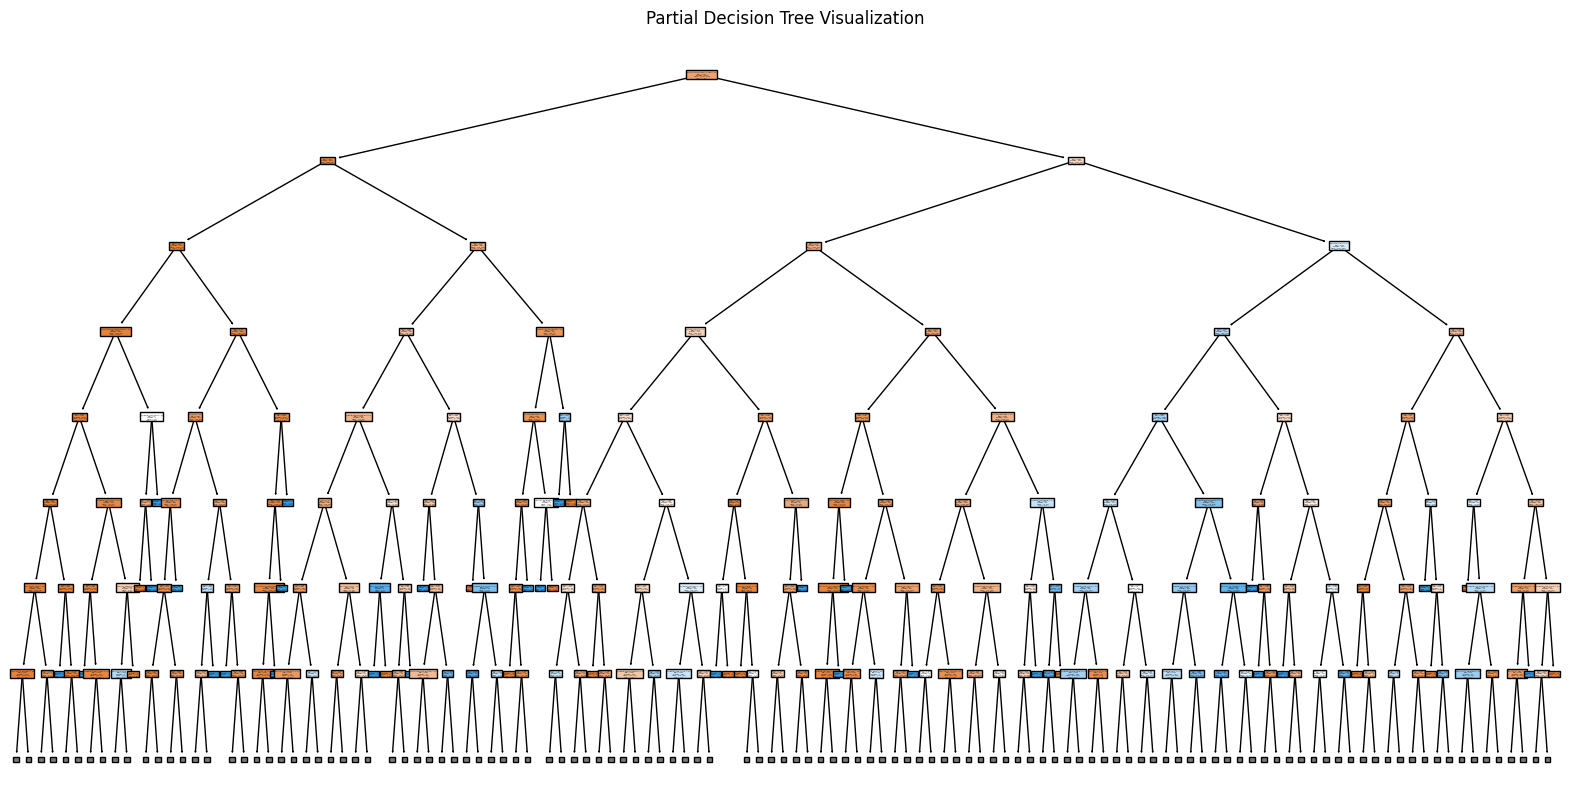

In [39]:
from sklearn.tree import DecisionTreeClassifier, export_text
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import plot_tree

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Get the textual representation of the decision tree
tree_rules = export_text(dt_classifier, feature_names=list(X_encoded.columns))

# Visualize a portion of the decision tree (optional)
# This may not display the entire tree but can be useful for a quick overview
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, filled=True, feature_names=X_encoded.columns, class_names=label_encoder.classes_, max_depth=7)
plt.title("Partial Decision Tree Visualization")
plt.show()


### Summary of the test dataset

In [45]:
# Assuming you have scikit-learn installed, you can use metrics for evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_curve, auc

classification_rep = classification_report(y_test, y_train_pred)
print('\nClassification Report:')
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      3011
           1       0.48      0.48      0.48       786

    accuracy                           0.78      3797
   macro avg       0.67      0.67      0.67      3797
weighted avg       0.78      0.78      0.78      3797



### Confusion matrix

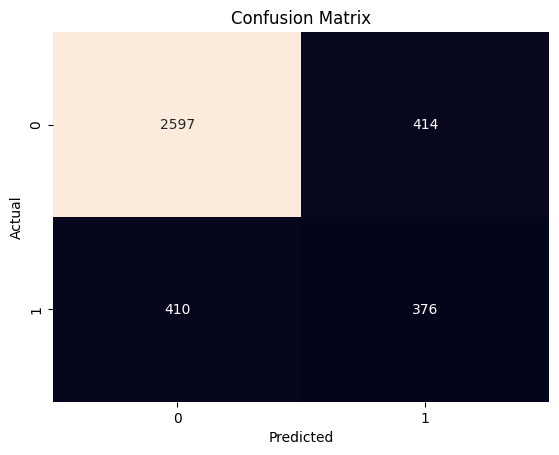

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



# Calculate the confusion matrix on the test set
conf_matrix = confusion_matrix(y_test, y_train_pred)

# Create a heatmap for the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Summary of training dataset


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11954
           1       1.00      1.00      1.00      3232

    accuracy                           1.00     15186
   macro avg       1.00      1.00      1.00     15186
weighted avg       1.00      1.00      1.00     15186

[[11954     0]
 [    0  3232]]


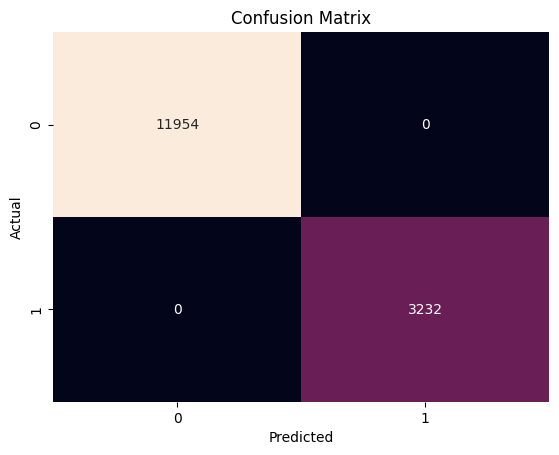

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(classification_report(y_train,y_train_pred_train))
print(confusion_matrix(y_train,y_train_pred_train))

# Calculate the confusion matrix on the test set
conf_matrix = confusion_matrix(y_train,y_train_pred_train)

# Create a heatmap for the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Evaluating the false positive rate and true positive rate

In [48]:
y_prob = dt_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

### Plotting the ROC curve

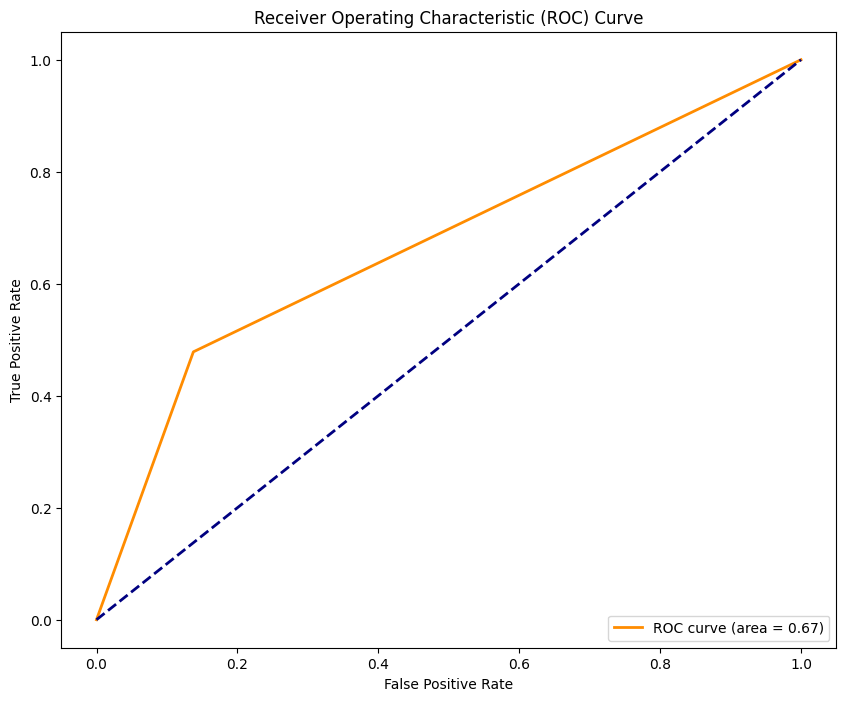

In [49]:
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Pruning the decision tree


In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree Classifier with a specific max_depth
max_depth_values = [5, 10, 15, None]  # None means unlimited depth

for max_depth in max_depth_values:
    # Initialize the Decision Tree Classifier
    dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=max_depth)

   # Fit the classifier to
    path = dt_classifier.cost_complexity_pruning_path(X_train, y_train)
    ccp_alphas, impurities = path.ccp_alphas, path.impurities
    


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

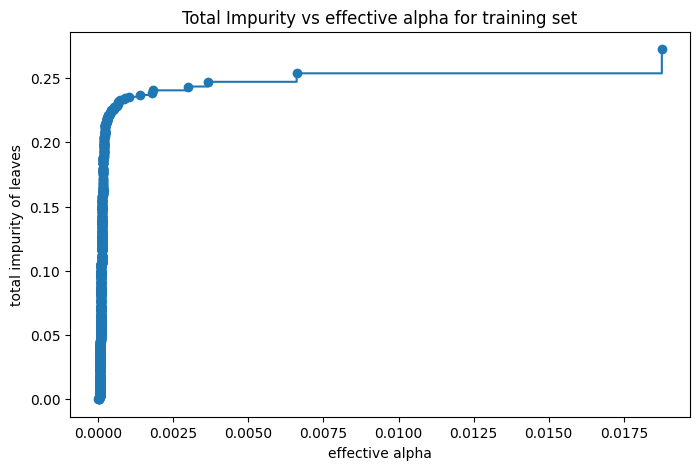

In [56]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")


In [57]:
dt_classifier = DecisionTreeClassifier(random_state=42, ccp_alpha=0.002)
dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.002, random_state=42)

In [58]:
from sklearn.metrics import accuracy_score

pred = dt_classifier.predict(X_test)
accuracy_score(y_test, pred)

0.8217013431656571

In [59]:
pred_1 = dt_classifier.predict(X_train)
accuracy_score(y_train,pred_1)

0.8284604240748057

In [60]:
# Assuming you have scikit-learn installed, you can use metrics for evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_curve, auc

classification_rep = classification_report(y_test,pred)
print('\nClassification Report:')
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      3011
           1       0.58      0.49      0.53       786

    accuracy                           0.82      3797
   macro avg       0.73      0.70      0.71      3797
weighted avg       0.81      0.82      0.82      3797



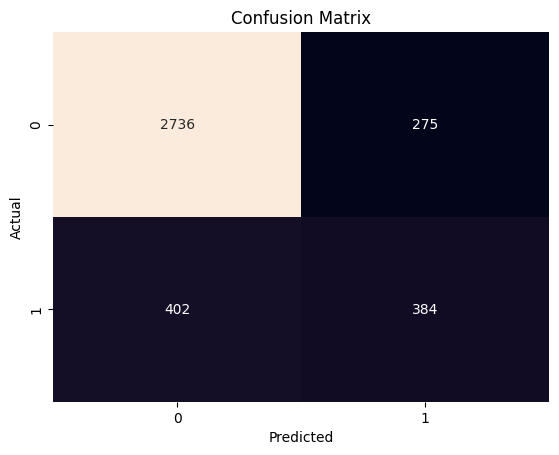

In [62]:
# Calculate the confusion matrix on the test set
conf_matrix = confusion_matrix(y_test,pred)

# Create a heatmap for the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

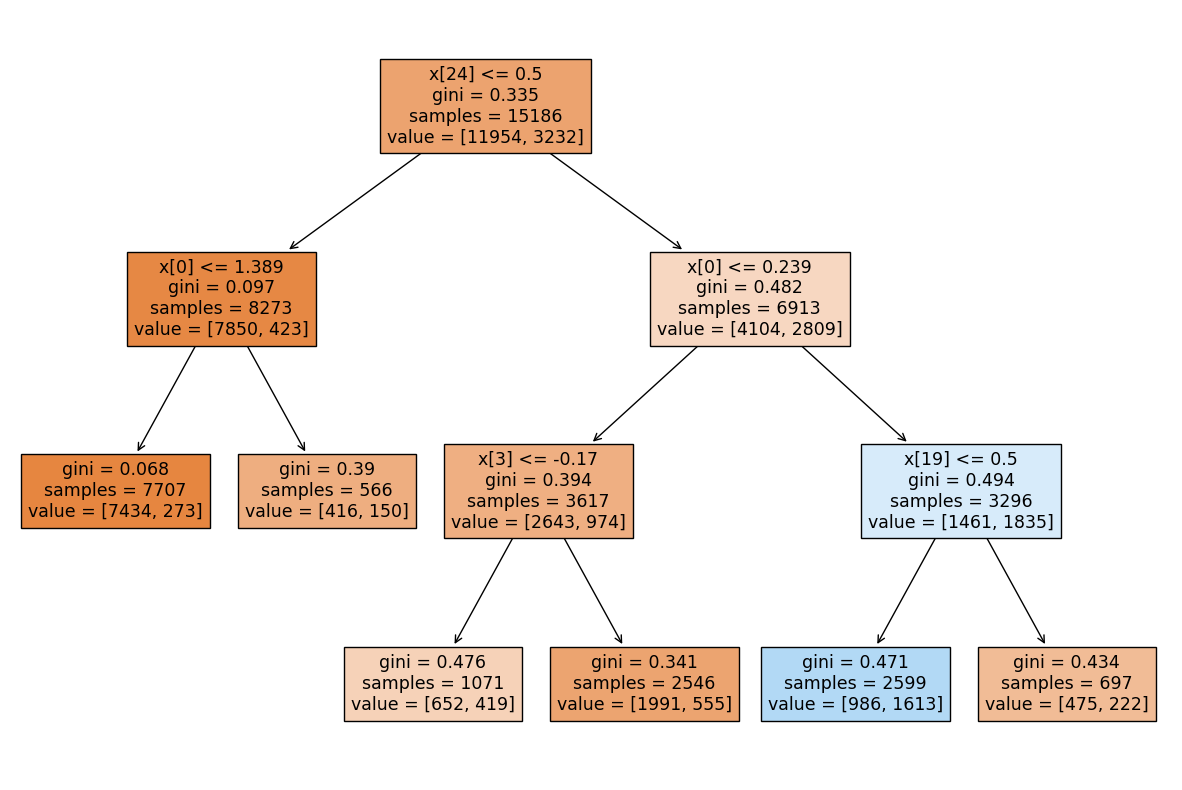

In [65]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
plot_tree(dt_classifier,filled=True)
plt.show()